In [1]:
# Подключаем наш гугл диск к блокноту
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
# Импорт необходимых нам библиотек
import numpy as np
import pandas as pd
import scipy.io as io
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Задание 1.

https://drive.google.com/file/d/1Nd2uCS0NmN3K-Y74GBSJEbZp4AynJAjz/view?usp=sharing - ссылка на датасет

In [3]:
path = "/content/gdrive/MyDrive/ex1data2.txt"

In [4]:
data = np.loadtxt(path, delimiter=',')
X = data[:, :-1]  # Указываем номера колонок(копируем все до последней), которые будут нашими фичами-признаками
y = data[:, -1]  # Указываем номер колонки(копируем последнюю), которая будет нашей целевой переменной

In [5]:
print(y)

[399900. 329900. 369000. 232000. 539900. 299900. 314900. 198999. 212000.
 242500. 239999. 347000. 329999. 699900. 259900. 449900. 299900. 199900.
 499998. 599000. 252900. 255000. 242900. 259900. 573900. 249900. 464500.
 469000. 475000. 299900. 349900. 169900. 314900. 579900. 285900. 249900.
 229900. 345000. 549000. 287000. 368500. 329900. 314000. 299000. 179900.
 299900. 239500.]


In [6]:
# Перед тем как запускать нашу модель обучаться - необходимо привести признаки к стандартному виду(Стандартизация)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
print(X_scaled)

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

In [8]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [9]:
# Создание и обучение модели линейной регрессии
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [10]:
# Полиномиальная регрессия
poly_degree = 2  # Задайте степень полинома
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

# Создание и обучение модели полиномиальной линейной регрессии
model_PLR = LinearRegression()
model_PLR.fit(X_poly_train, y_train)

LinearRegression()

In [11]:
# Предсказания на тестовой выборке
predictions_LR_test = model_LR.predict(X_test)
predictions_PLR_test = model_PLR.predict(X_poly_test)
# X_poly_test - данные после полиномиальной обработки

In [12]:
# Оценка моделей на тестовой выборке
mse_LR_test = mean_squared_error(y_test, predictions_LR_test)
mae_LR_test = mean_absolute_error(y_test, predictions_LR_test)
r2_LR_test = r2_score(y_test, predictions_LR_test)
mse_PLR_test = mean_squared_error(y_test, predictions_PLR_test)
mae_PLR_test = mean_absolute_error(y_test, predictions_PLR_test)
r2_PLR_test = r2_score(y_test, predictions_PLR_test)

In [13]:
print(f"Mean Squared Error (Одномерная регрессия) на тестовой выборке: {mse_LR_test}")
print(f"Mean Absolute Error (Одномерная регрессия) на тестовой выборке: {mae_LR_test}")
print(f"r2 score (Одномерная регрессия) на тестовой выборке: {r2_LR_test}")
print(f"Mean Squared Error (Полиномиальная регрессия) на тестовой выборке: {mse_PLR_test}")
print(f"Mean Absolute Error (Полиномиальная регрессия) на тестовой выборке: {mae_PLR_test}")
print(f"r2 score (Полиномиальная регрессия) на тестовой выборке: {r2_PLR_test}")

Mean Squared Error (Одномерная регрессия) на тестовой выборке: 2766239087.094457
Mean Absolute Error (Одномерная регрессия) на тестовой выборке: 42338.653650640816
r2 score (Одномерная регрессия) на тестовой выборке: 0.826811266941067
Mean Squared Error (Полиномиальная регрессия) на тестовой выборке: 2805753343.8614798
Mean Absolute Error (Полиномиальная регрессия) на тестовой выборке: 40861.21297420074
r2 score (Полиномиальная регрессия) на тестовой выборке: 0.824337357834955


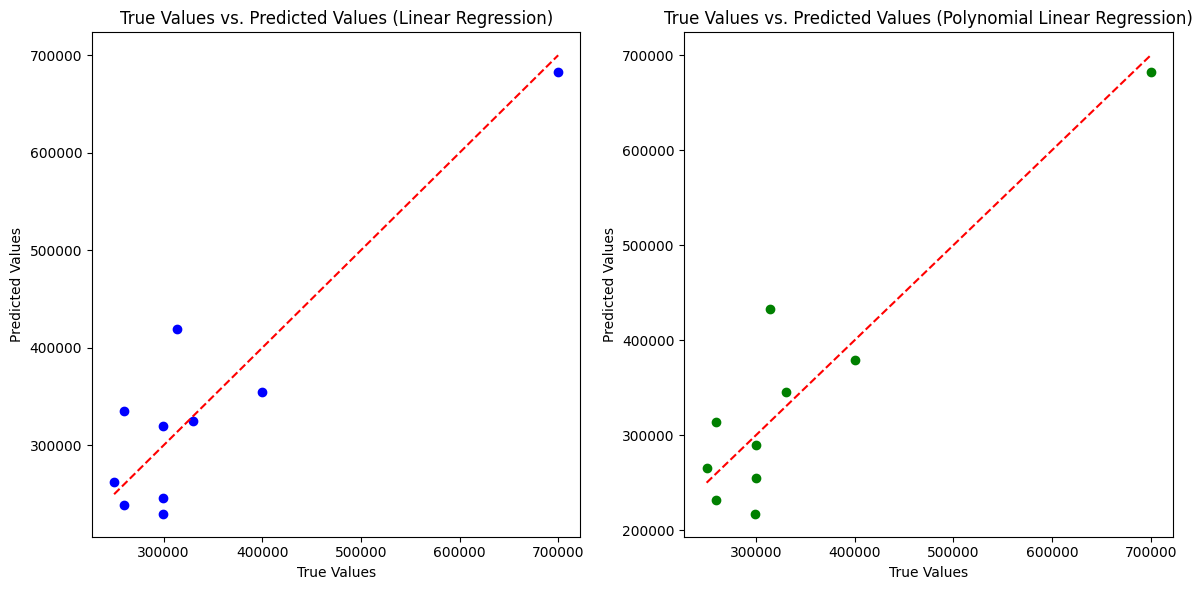

In [14]:
predictions_LR_test = model_LR.predict(X_test)
predictions_PLR_test = model_PLR.predict(X_poly_test)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions_LR_test, color='blue')
plt.title('True Values vs. Predicted Values (Linear Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_PLR_test, color='green')
plt.title('True Values vs. Predicted Values (Polynomial Linear Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.tight_layout()
plt.show()


In [15]:
# Ridge регрессия с L2-регуляризацией
alpha = 1.0  # Параметр регуляризации, можно настроить
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

Ridge()

In [16]:
# Lasso регрессия с L1-регуляризацией
alpha = 1.0  # Параметр регуляризации, можно настроить
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

Lasso()

In [17]:
# Предсказания с регуляризацией
predictions_ridge_test = ridge_model.predict(X_test)
predictions_lasso_test = lasso_model.predict(X_test)

In [18]:
# Оценка моделей с регуляризацией
mse_ridge_test = mean_squared_error(y_test, predictions_ridge_test)
mae_ridge_test = mean_absolute_error(y_test, predictions_ridge_test)
r2_ridge_test = r2_score(y_test, predictions_ridge_test)
mse_lasso_test = mean_squared_error(y_test, predictions_lasso_test)
mae_lasso_test = mean_absolute_error(y_test, predictions_lasso_test)
r2_lasso_test = r2_score(y_test, predictions_lasso_test)

In [19]:
print(f"Mean Squared Error (Ridge регрессия) на тестовой выборке: {mse_ridge_test}")
print(f"Mean Absolute Error (Ridge регрессия) на тестовой выборке: {mae_ridge_test}")
print(f"r2 score (Ridge регрессия) на тестовой выборке: {r2_ridge_test}")
print(f"Mean Squared Error (Lasso регрессия) на тестовой выборке: {mse_lasso_test}")
print(f"Mean Absolute Error (Lasso регрессия) на тестовой выборке: {mae_lasso_test}")
print(f"r2 score (Lasso регрессия) на тестовой выборке: {r2_lasso_test}")

Mean Squared Error (Ridge регрессия) на тестовой выборке: 2774813648.753358
Mean Absolute Error (Ridge регрессия) на тестовой выборке: 43105.52743962398
r2 score (Ridge регрессия) на тестовой выборке: 0.826274430672225
Mean Squared Error (Lasso регрессия) на тестовой выборке: 2766176434.8608255
Mean Absolute Error (Lasso регрессия) на тестовой выборке: 42338.03365515059
r2 score (Lasso регрессия) на тестовой выборке: 0.8268151894729323
